<a href="https://colab.research.google.com/github/tainangao/Cybersecurity/blob/master/WEEK_3_FRAUD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'USERNAME' = 'XXX'
'API_KEY' = 'XXXXXXXX'

SyntaxError: ignored

In [0]:
!pip install kaggle
api_token = {"username":"USERNAME","key":"API_KEY"}
import json
import zipfile
import os
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /content/.kaggle/kaggle.json
!kaggle config path -p /content
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge
os.chdir('/content/competitions/jigsaw-toxic-comment-classification-challenge')
for file in os.listdir():
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall()
    zip_ref.close()

FileNotFoundError: ignored

In [0]:
! pip install -q kaggle

In [0]:
from google.colab import files

In [0]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tainangao","key":"652178c9154b6ae494fd27a5dc17f549"}'}

In [0]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
! kaggle datasets list

ref                                                       title                                              size  lastUpdated          downloadCount  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
dgomonov/new-york-city-airbnb-open-data                   New York City Airbnb Open Data                      2MB  2019-08-12 16:24:45           9674  
lakshyaag/india-trade-data                                India - Trade Data                                  1MB  2019-08-16 16:13:58           5707  
therohk/ireland-historical-news                           The Irish Times - Waxy-Wany News                   47MB  2019-08-24 15:36:54            818  
bradklassen/pga-tour-20102018-data                        PGA Tour Golf Data                                 94MB  2019-08-30 00:09:59           5135  
r3w0p4/bournemouth-venues                                 Venues in Bournemouth         

In [0]:
! kaggle competitions download -c 'ieee-fraud-detection'

 93% 49.0M/52.5M [00:01<00:00, 31.5MB/s]
100% 52.5M/52.5M [00:01<00:00, 41.9MB/s]
  0% 0.00/3.02M [00:00<?, ?B/s]
100% 3.02M/3.02M [00:00<00:00, 92.7MB/s]
 87% 41.0M/47.3M [00:01<00:00, 22.7MB/s]
100% 47.3M/47.3M [00:01<00:00, 36.3MB/s]
  0% 0.00/2.97M [00:00<?, ?B/s]
100% 2.97M/2.97M [00:00<00:00, 97.9MB/s]
  0% 0.00/1.14M [00:00<?, ?B/s]
100% 1.14M/1.14M [00:00<00:00, 161MB/s]


In [0]:
!unzip test_identity.csv.zip
!unzip test_transaction.csv.zip
!unzip train_identity.csv.zip
!unzip train_transaction.csv.zip
!unzip sample_submission.csv.zip

Archive:  test_identity.csv.zip
  inflating: test_identity.csv       
Archive:  test_transaction.csv.zip
  inflating: test_transaction.csv    
Archive:  train_identity.csv.zip
  inflating: train_identity.csv      
Archive:  train_transaction.csv.zip
  inflating: train_transaction.csv   
Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   


In [0]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [0]:
import warnings
warnings.simplefilter('ignore')

from time import time
import datetime

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]
import seaborn as sns
sns.set()


# Preprocessing, modelling and evaluating
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold

## Hyperopt modules
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, STATUS_RUNNING
from functools import partial

import os
import gc
# print(os.listdir("../input"))

In [0]:
%%time
warnings.simplefilter('ignore')
files = ['test_identity.csv', 
         'test_transaction.csv',
         'train_identity.csv',
         'train_transaction.csv',
         'sample_submission.csv']

def load_data(file):
    return reduce_mem_usage(pd.read_csv(file))

with multiprocessing.Pool() as pool:
    test_identity, test_transaction, train_identity, train_transaction, sample_submission = pool.map(load_data, files)

Mem. usage decreased to 25.44 Mb (42.7% reduction)
Mem. usage decreased to 25.86 Mb (42.7% reduction)
Mem. usage decreased to 472.59 Mb (68.9% reduction)
Mem. usage decreased to  2.90 Mb (62.5% reduction)
Mem. usage decreased to 542.35 Mb (69.4% reduction)
CPU times: user 3.1 s, sys: 2.45 s, total: 5.55 s
Wall time: 4min 36s


In [0]:
train = pd.merge(train_identity, train_transaction, how = 'right', on = 'TransactionID')
train.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,...,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,...,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,...,1.0,1.0,1.0,1.0,1.0,1.0,166.215393,166.215393,166.215393,90.3125,90.3125,31.84375,90.3125,90.3125,90.3125,90.3125,0.0,0.0,0.0,75.887497,75.887497,75.887497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,...,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,...,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
test = pd.merge(test_identity, test_transaction, how = 'right', on = 'TransactionID')
test.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,...,NaN,NaN,1.0,1.0,1.0,1.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,...,0.0,0.0,1.0,3.0,2.0,1.0,0.000,270.000,90.000,0.0,270.0,0.0,90.0,60.0,310.0,130.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,8.0,2.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,310.0,90.0,0.0,310.0,90.0,0.0,0.0,0.0
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,...,NaN,NaN,1.0,1.0,1.0,1.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,...,NaN,NaN,1.0,1.0,1.0,1.0,6.271,6.271,6.271,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,6.271,6.271,6.271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,...,NaN,NaN,1.0,1.0,1.0,1.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
fraud = train.loc[train['isFraud'] == 1]
non_fraud = train.loc[train['isFraud'] == 0]
print(len(fraud))
print(len(non_fraud))

20663
569877


In [0]:
print('  {:.4f}% of Transactions that are fraud in train '.format(train['isFraud'].mean() * 100))

  3.4990% of Transactions that are fraud in train 


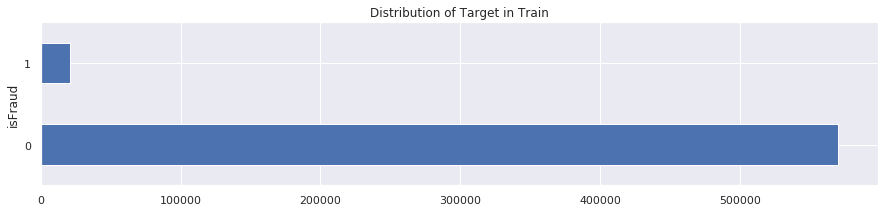

In [0]:
train.groupby('isFraud') \
    .count()['TransactionID'] \
    .plot(kind='barh',
          title='Distribution of Target in Train',
          figsize=(15, 3))
plt.show()

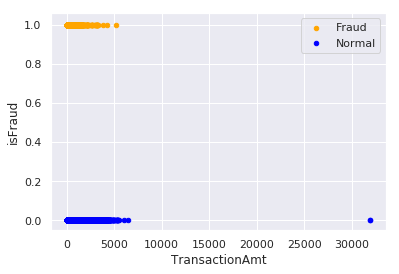

In [0]:
ax = fraud.plot.scatter(x='TransactionAmt', y='isFraud', color='Orange', label='Fraud')
non_fraud.plot.scatter(x='TransactionAmt', y='isFraud', color='Blue', label='Normal', ax=ax)
plt.show()

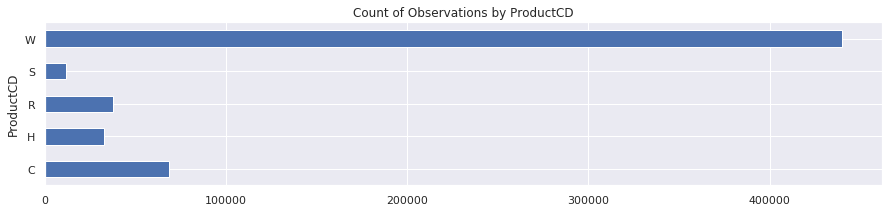

In [0]:
train.groupby('ProductCD') \
    ['TransactionID'].count() \
    .sort_index() \
    .plot(kind='barh',
          figsize=(15, 3),
         title='Count of Observations by ProductCD')
plt.show()

In [0]:
null_percent = train.isnull().sum()/train.shape[0]*100
cols_to_drop = np.array(null_percent[null_percent > 50].index)
cols_to_drop

array(['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07',
       'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21',
       'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28',
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35',
       'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'dist1',
       'dist2', 'R_emaildomain', 'D5', 'D6', 'D7', 'D8', 'D9', 'D12',
       'D13', 'D14', 'M5', 'M7', 'M8', 'M9', 'V138', 'V139', 'V140',
       'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148',
       'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156',
       'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164',
       'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172',
       'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180',
       'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188',
       'V189',

In [0]:
train1 = train.drop(cols_to_drop, axis=1)
test1 = test.drop(cols_to_drop,axis=1)

In [0]:
train1.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=220)

In [0]:
test1.columns

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=219)

In [0]:
print(train.shape)
print(train1.shape)

(590540, 434)
(590540, 220)


In [0]:
print(test.shape)
print(test1.shape)

(506691, 433)
(506691, 219)


In [0]:
#now we can do label encoding for categorical variable
# we can do one hot encoding but it will increase our dimension so its problem
# so we can try label encoding or any other encoding like frequency encoding .etc
# i am going to try label encoding
from sklearn  import preprocessing
for col in train1.columns:
    if train1[col].dtype=='object' :
      #  print("label encoding",col)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train1[col].values) + list(test[col].values))
        train1[col] =lbl.transform(list(train1[col].values))
        test1[col]=lbl.transform(list(test1[col].values))

In [0]:
def clean_inf_nan(df):
    return df.replace([np.inf, -np.inf], np.nan)   

# Cleaning infinite values to NaN
train1 = clean_inf_nan(train1)
test1 = clean_inf_nan(test1 ) # replace all nan,inf,-inf to nan so it will be easy to replace
for i in train1.columns:
    train1[i].fillna(train1[i].median(),inplace=True) # fill with median because mean may be affect by outliers.
#X.isna().sum().sum()
for i in test1.columns:
    test1[i].fillna(test1[i].median(),inplace=True)

In [0]:
print("Number of Na's in train",train1.isna().sum().sum())
print("Number of Na's in test",test1.isna().sum().sum())

Number of Na's in train 0
Number of Na's in test 0


In [0]:
# now we an split the data and train our model
X_train = train1.drop(['isFraud', 'TransactionDT', 'TransactionID'], axis=1)
y_train = train1['isFraud']
#X_test = test.sort_values('TransactionDT').drop(['TransactionDT', 'TransactionID'], axis=1)
X_test = test1.drop(['TransactionDT', 'TransactionID'], axis=1)


In [0]:
from sklearn.linear_model import LogisticRegressionCV

In [0]:
clf=LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)

In [0]:
logistic_predictions = clf.predict(X_test)

In [0]:
score = clf.score(X_train, y_train)
print(score)

0.9654671995123107


In [0]:

sample_submission['isFraud'] = logistic_predictions
sample_submission.head()

,TransactionID,isFraud
0,3663549,0
1,3663550,0
2,3663551,0
3,3663552,0
4,3663553,0


In [0]:
sample_submission.to_csv('submission.csv', index=False)